<div class="alert alert-block alert-info">
<h3>Goal:</h3>
Find out what sorts of people were more likely to survive?
</div>

<div class="alert alert-block alert-warning">
<h4>1.) Data understading</h4>
<h4>2.) Data exploration</h4>
<h4>3.) Data preparation</h4>
<h4>3.5) Data Optimization</h4>
<h4>4.) Data modeling</h4>
<h4>5.) Deployment</h4>
</div>

<div class="alert alert-block alert-success">
<h3>Data Understanding</h3>
</div>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#read data from csv
train_data = pd.read_csv("./titanic/train.csv")
test_data = pd.read_csv("./titanic/test.csv")

In [3]:
#explore sample data 15 rows
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#show data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div class="alert alert-block alert-success">
<h3>Data exploration</h3>
</div>

In [5]:
#check null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#sum null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

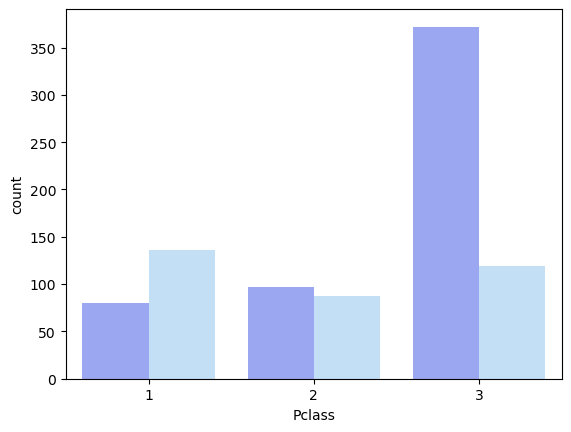

In [7]:
#data visualization
#survive rate compare with pclass (ticket class)
sns.countplot(x='Pclass', data=train_data, palette=["#8D9EFF","#B9E0FF"], hue="Survived")
plt.legend([],[], frameon=False)
#plt.savefig('ticket_class_survived.png', format='png', dpi=300) //save as png

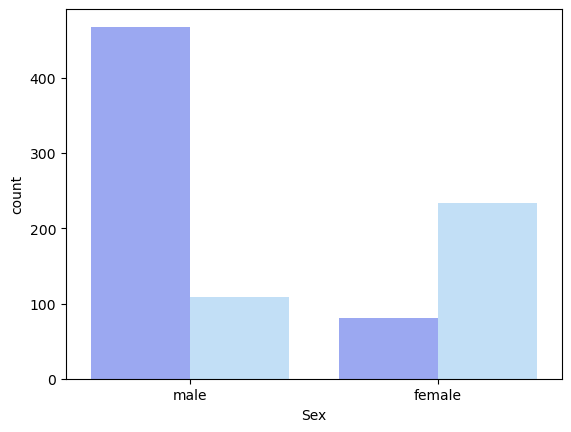

In [8]:
#survive rate compare with sex
sns.countplot(x='Sex', data=train_data, palette=["#8D9EFF","#B9E0FF"], hue="Survived")
plt.legend([],[], frameon=False)
#plt.savefig('sex_survived.png', format='png', dpi=300)

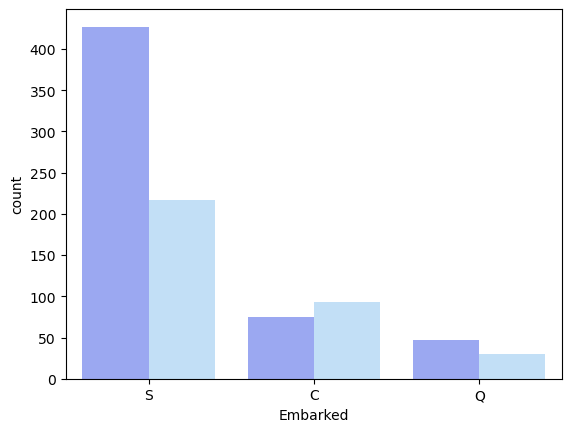

In [9]:
#survive rate compare with embarked
sns.countplot(x='Embarked', data=train_data, palette=["#8D9EFF","#B9E0FF"], hue="Survived")
plt.legend([],[], frameon=False)
#plt.savefig('embarked_survived.png', format='png', dpi=300)

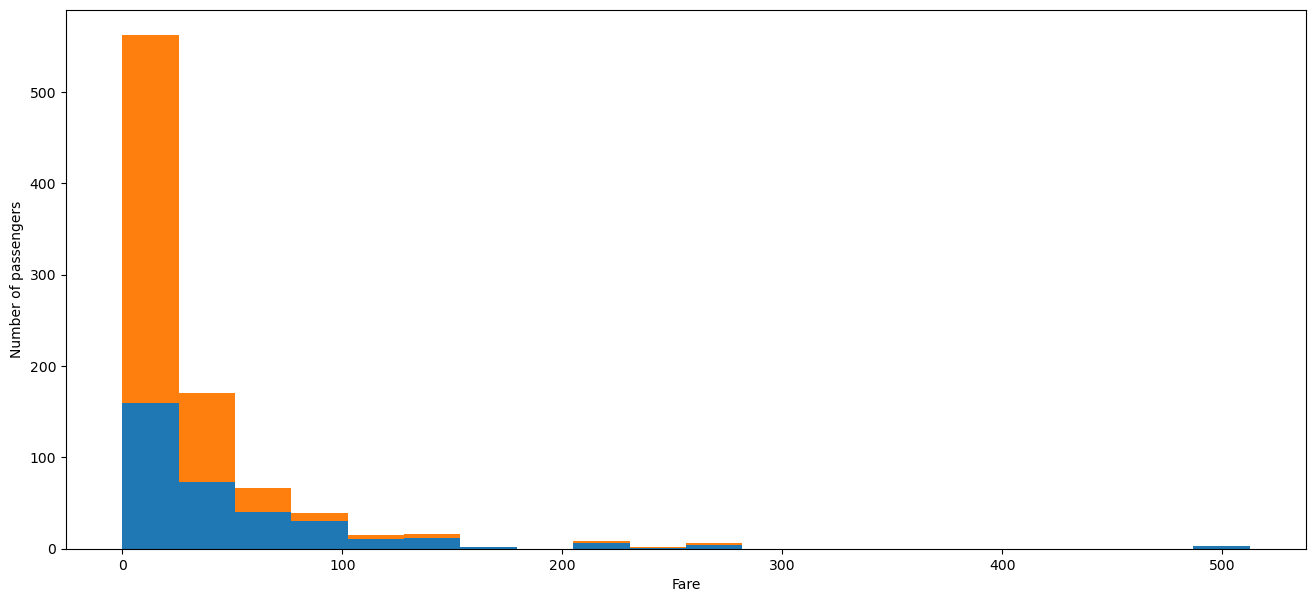

In [10]:
#new feature 'Died' just for visualize
train_data['Died'] = 1 - train_data['Survived']
#survive rate with fare
figure = plt.figure(figsize=(16, 7))
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], 
         stacked=True, bins = 20, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.legend([],[], frameon=False)
#plt.savefig('fare_survived.png', format='png', dpi=300)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

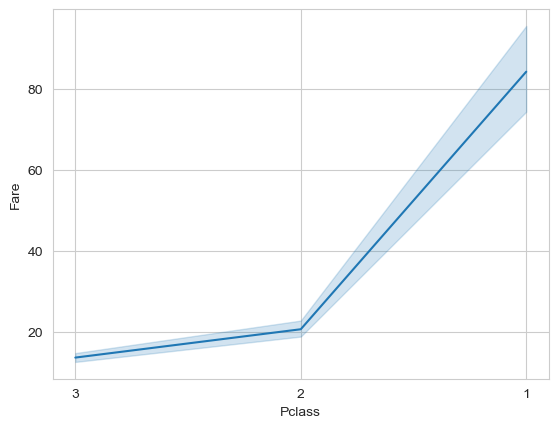

In [11]:
#relation between fare and ticket class
lcp = train_data.copy()
lcp["Pclass"] = lcp["Pclass"].astype(str)
sns.set_style("whitegrid", {"grid.color": ".8", "grid.linestyle": "-"})
sns.lineplot(data=lcp.sort_values(by=["Pclass"], ascending=False), y="Fare", x="Pclass", palette="white")
#plt.savefig('pclass_fare.png', format='png', dpi=300)

In [12]:
#survive rate compare with title
svt = train_data[train_data.Title != "Officer"].copy()
svt1 = svt[svt.Title != "Master"].copy()
svt2 = svt1[svt1.Title != "Royalty"].copy()
sns.countplot(x='Title', data=svt2, palette=["#8D9EFF","#B9E0FF"], hue="Survived")
plt.legend([],[], frameon=False)
#plt.savefig('title_survived.png', format='png', dpi=300)

AttributeError: 'DataFrame' object has no attribute 'Title'

In [ ]:
#pearson correlation 
colormap = plt.cm.Blues
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(cleaned_data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
#plt.savefig('pc_heatmap.png', format='png', dpi=600)

<div class="alert alert-block alert-success">
<h3>Data Preparation</h3>
</div>

In [13]:
#adding new feature 'Title'
#extract title from name
titles = set()
for name in train_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Rev', 'Sir', 'Don', 'Col', 'Dr', 'Ms', 'Major', 'Mrs', 'Lady', 'the Countess', 'Capt', 'Jonkheer', 'Mlle', 'Mr', 'Mme', 'Miss', 'Master'}


In [14]:
#generate title dictionary
Title_Dictionary = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty","Don": "Royalty","Sir" : "Royalty","Dr": "Officer","Rev": "Officer","the Countess":"Royalty","Mme": "Mrs","Mlle": "Miss","Ms": "Mrs","Mr" : "Mr","Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}

In [15]:
train_data['Title'] = train_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_data['Title'] = train_data.Title.map(Title_Dictionary)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [16]:
#clean dataset
#drop unused column
cleaned_data=train_data.drop(['Name','Ticket','Cabin','PassengerId','Died'], axis=1)
cleaned_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [17]:
#feature engineering
#convert categorical feature to numeric
#add label for Sex
cleaned_data.Sex=cleaned_data.Sex.map({'female':0, 'male':1})

In [18]:
#add label for Embarked
cleaned_data.Embarked=cleaned_data.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})

In [19]:
#add label for title
cleaned_data.Title=cleaned_data.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
cleaned_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0
5,0,3,1,NaN,0,0,8.4583,2,0
6,0,1,1,54.0,0,0,51.8625,0,0
7,0,3,1,2.0,3,1,21.0750,0,3
8,1,3,0,27.0,0,2,11.1333,0,2
9,1,2,0,14.0,1,0,30.0708,1,2


In [20]:
#check null value again
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [21]:
#handle null values on age and embarked
#fill null age with median age of each Sex
median_age_men=cleaned_data[cleaned_data['Sex']==1]['Age'].median()
median_age_women=cleaned_data[cleaned_data['Sex']==0]['Age'].median()

In [22]:
# filling null values in 'Age' with respective median age
cleaned_data.loc[(cleaned_data.Age.isnull()) & (cleaned_data['Sex']==1),'Age']=median_age_men
cleaned_data.loc[(cleaned_data.Age.isnull()) & (cleaned_data['Sex']==0),'Age']=median_age_women

In [23]:
#check null value again
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [24]:
# drop 2 rows which have null value
cleaned_data.dropna(inplace=True)

In [25]:
#finally clean :)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 69.5+ KB


In [26]:
#check current data, it looks good now :). But we need to optimize for getting better result
cleaned_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,4
887,1,1,0,19.0,0,0,30.0000,0,1
888,0,3,0,27.0,1,2,23.4500,0,1
889,1,1,1,26.0,0,0,30.0000,1,0


<div class="alert alert-block alert-success">
<h3>Data Optimization</h3>
</div>

In [27]:
#normalize big scale data (age, fare)
cleaned_data.Age = (cleaned_data.Age-min(cleaned_data.Age))/(max(cleaned_data.Age)-min(cleaned_data.Age))
cleaned_data.Fare = (cleaned_data.Fare-min(cleaned_data.Fare))/(max(cleaned_data.Fare)-min(cleaned_data.Fare))

In [28]:
#check data statistics
cleaned_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.364099,0.524184,0.382452,0.062649,0.733408
std,0.486260,0.834700,0.477538,0.163160,1.103705,0.806761,0.097003,1.051499
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000
50%,0.000000,3.000000,1.000000,0.359135,0.000000,0.000000,0.028213,0.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,5.000000


<div class="alert alert-block alert-success">
<h3>Data Modeling</h3>
</div>

In [29]:
#split dataset into training set and validation set
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_data.drop(['Survived'], axis=1),
    cleaned_data.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=cleaned_data.Survived
)

In [30]:
# use Logistic regression algorithm
#train model
lr = LogisticRegression()
lr.fit(X_train, y_train)

#use model to predict validation set
Y_pred = lr.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8426966292134831

In [31]:
# use Gradient Boosting Classifier
#train model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

#use model to predict validation set
Y_pred = gb.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8707865168539326

In [32]:
# use Random Forest Classifier
#train model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#use model to predict validation set
Y_pred = rf.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8539325842696629

In [33]:
#track model training result with confusion matrix
cm=confusion_matrix(y_test, Y_pred)
cm

array([[99, 11],
       [15, 53]], dtype=int64)

<AxesSubplot:>

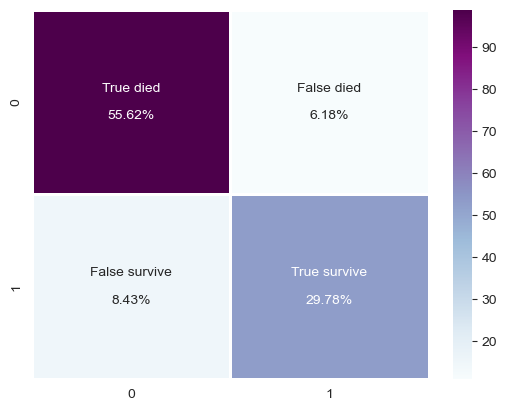

In [34]:
#confusion matrix with mixed data
group_names = ["True died","False died","False survive","True survive"]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels, cmap="BuPu", linewidths=2, fmt='',)
#plt.savefig('confusion_matrix_mix.png', format='png', dpi=600)

<div class="alert alert-block alert-warning">
That is all for training model in step 1 to 4. We already have the model but we need to generate the prediction with Kaggle testing set. So, we will repeat the same step 3 to testing set
</div>

<div class="alert alert-block alert-success">
<h3>Repeat step 3</h3>
</di

In [35]:
#check test set null values
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
#extract title from test name
titles = set()
for name in test_data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Dona', 'Col', 'Rev', 'Dr', 'Ms', 'Mrs', 'Mr', 'Miss', 'Master'}


In [37]:
test_data['Title'] = test_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data.Title.map(Title_Dictionary)
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


In [38]:
#drop unused coloumn
cleaned_test=test_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [39]:
#check null values again
cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
 7   Title     417 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [40]:
#feature engineering
#convert categorical feature to numeric
#add label to Sex 
cleaned_test.Sex=cleaned_test.Sex.map({'female':0, 'male':1})

In [41]:
#add label to Embarked
cleaned_test.Embarked=cleaned_test.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})

In [42]:
#add label to title
cleaned_test.Title=cleaned_test.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
cleaned_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0


In [43]:
#handle null value
#fill test null age with median age of each Sex
median_age_men2=cleaned_test[cleaned_test['Sex']==1]['Age'].median()
median_age_women2=cleaned_test[cleaned_test['Sex']==0]['Age'].median()

In [44]:
cleaned_test.loc[(cleaned_test.Age.isnull()) & (cleaned_test['Sex']==1),'Age']=median_age_men2
cleaned_test.loc[(cleaned_test.Age.isnull()) & (cleaned_test['Sex']==0),'Age']=median_age_women2

In [45]:
# fill test null fare with median fare
cleaned_test['Fare']=cleaned_test['Fare'].fillna(cleaned_test['Fare'].median())

In [46]:
#check null values again
cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
 7   Title     417 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 26.2+ KB


In [47]:
#check specific null values
cleaned_test[cleaned_test.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,0,39.0,0,0,108.9,1,NaN


In [48]:
#sex = 0 means female and probably get married, so we filled it with mrs(2).
cleaned_test=cleaned_test.fillna(2)

In [49]:
#finally clean :)
cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 26.2 KB
